<a href="https://colab.research.google.com/github/DRAGNIIR/AI-learning/blob/main/face_recor_friend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import liberary
import os 
import numpy as np
from numpy import save
from keras.utils import to_categorical, load_img, img_to_array
from keras.models import Sequential,Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout, LeakyReLU
from keras.optimizers import SGD
import matplotlib.pyplot as plt

# create a folder variable to contain photos
folder = '/content/drive/MyDrive/face'

photos, labels = list(), list()

# input image with 3 friend "Bạn Đức" "Bạn Vương" "Bạn Phúc"
for file in os.listdir(folder):
    output = None
    if file.startswith('Duc'):
        output = 0   
    elif file.startswith('Vuong'):
        output = 1
    elif file.startswith('Phuc'):
        output = 2
   

#adding photos to a data set
    if output is not None:
       
        image = load_img(os.path.join(folder, file), target_size=(200,200,3))
        image = img_to_array(image) 
        
        photos.append(image)
        labels.append(output)

#redefine type for array
photos = np.array(photos) 
labels = np.array(labels)

#normalizing photos array
photos = photos.astype('float32')/255

# One-hot encode labels
labels = to_categorical(labels,3)

#shaping a model with 'Conv2D' 'leakyReLU' 'maxpooling2D'
model = Sequential()
model.add(Conv2D(128,(3,3), padding='same', input_shape=(200, 200,3)))
model.add(Activation('linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))



model.add(Conv2D(128,(3,3), padding = 'same'))
model.add(Activation('linear'))
model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(3, activation='softmax'))
model.summary()

#compile the model using sgd
sgd = SGD(lr = 0.001, decay = 1e-6, momentum = 0.9, nesterov= True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history = model.fit(photos, labels, batch_size=128, epochs=20, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 128)     3584      
                                                                 
 activation (Activation)     (None, 200, 200, 128)     0         
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 200, 200, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 128)     147584    
                                                                 
 activation_1 (Activation)   (None, 100, 100, 128)     0         
                                                        

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
1/1 [==============================] - 46s 46s/step - loss: 1.1419 - accuracy: 0.1856
Epoch 2/20
1/1 [==============================] - 40s 40s/step - loss: 0.7791 - accuracy: 0.6598
Epoch 3/20
1/1 [==============================] - 39s 39s/step - loss: 0.7778 - accuracy: 0.6598
Epoch 4/20
1/1 [==============================] - 38s 38s/step - loss: 0.7405 - accuracy: 0.6598
Epoch 5/20
1/1 [==============================] - 40s 40s/step - loss: 0.6774 - accuracy: 0.6598
Epoch 6/20
1/1 [==============================] - 37s 37s/step - loss: 0.6326 - accuracy: 0.6598
Epoch 7/20
1/1 [==============================] - 39s 39s/step - loss: 0.5928 - accuracy: 0.7113
Epoch 8/20
1/1 [==============================] - 38s 38s/step - loss: 0.5585 - accuracy: 0.7113
Epoch 9/20
1/1 [==============================] - 39s 39s/step - loss: 0.5202 - accuracy: 0.7526
Epoch 10/20
1/1 [==============================] - 41s 41s/step - loss: 0.4794 - accuracy: 0.7938
Epoch 11/20
1/1 [============

[0.1855670064687729, 0.6597937941551208, 0.6597937941551208, 0.6597937941551208, 0.6597937941551208, 0.6597937941551208, 0.7113401889801025, 0.7113401889801025, 0.7525773048400879, 0.7938144207000732, 0.8453608155250549, 0.8865979313850403, 0.907216489315033, 0.938144326210022, 0.938144326210022, 0.9793814420700073, 0.969072163105011, 0.969072163105011, 0.9793814420700073, 0.969072163105011]
[1.1418943405151367, 0.7790847420692444, 0.7777901291847229, 0.7404865622520447, 0.6774142384529114, 0.6325542330741882, 0.5927751660346985, 0.558472216129303, 0.5202220678329468, 0.47941476106643677, 0.43921443819999695, 0.40809324383735657, 0.37463700771331787, 0.34166964888572693, 0.306642085313797, 0.2770605981349945, 0.24884334206581116, 0.2348901480436325, 0.20335733890533447, 0.18629825115203857]


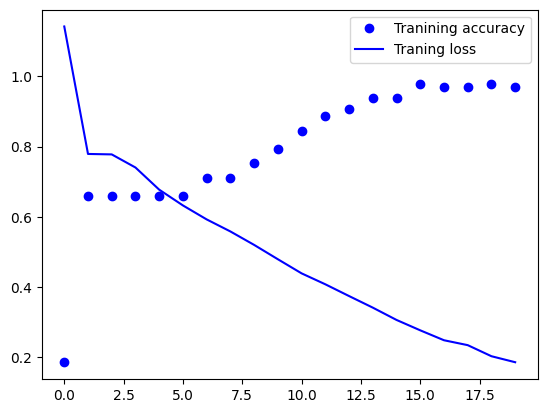

4/4 [==============================] - 10s 2s/step - loss: 0.1548 - accuracy: 0.9794
Test loss: 0.15483112633228302
Test accuracy: 0.9793814420700073


In [ ]:
#evaluate the accuracy of the trained model
accuracy=history.history['accuracy']
loss=history.history['loss']
print(accuracy)
print(loss)

#ploting the graph using mathplot
plt.plot(accuracy,'bo',label='Tranining accuracy')
plt.plot(loss,'b',label='Traning loss')
plt.legend()
plt.show()
model.save('my_friend_faces.h3')

#test score and accuracy of the model 
score = model.evaluate(photos, labels, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 194ms/step
[[0.02352834 0.03153988 0.94493175]]


'phuc'

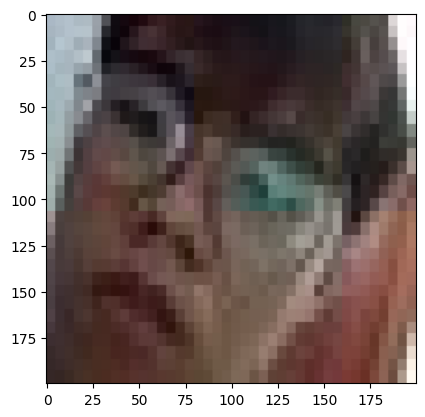

In [ ]:
#create classes for 3 friend
classes= ['Duc','Vuong','phuc']

#loading image and reshape
img= load_img('/content/drive/MyDrive/test_face/Phuc58.jpg', target_size=(200,200,3))

plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')/255

#predict the image
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]